In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [9]:
#Load Cleansed Data
df_analysis_school = pd.read_csv('/content/New_Cleansed_Data.csv')

In [10]:
#Transform SchoolClosing Info
df_analysis_school.loc[df_analysis_school['SchoolClosing'] == 0, 'SchoolClosingDetail'] = 'No_Measure'
df_analysis_school.loc[df_analysis_school['SchoolClosing'] == 1, 'SchoolClosingDetail'] = 'Recommended_Closing'
df_analysis_school.loc[df_analysis_school['SchoolClosing'] == 2, 'SchoolClosingDetail'] = 'Required_Closing_Few'
df_analysis_school.loc[df_analysis_school['SchoolClosing'] == 3, 'SchoolClosingDetail'] = 'Required_Closing_All'

In [12]:
#Select Specific Columns
df_analysis_school = df_analysis_school[['State', 'Date','SchoolClosingDetail']]

In [13]:
df_graph_school = df_analysis_school.groupby(['State', 'SchoolClosingDetail'])['Date'].count().reset_index(name = 'Counts')

In [21]:
df1_graph_school = pd.pivot_table(df_graph_school, values= 'Counts', index= ['State'], columns= 'SchoolClosingDetail').reset_index()

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Days')

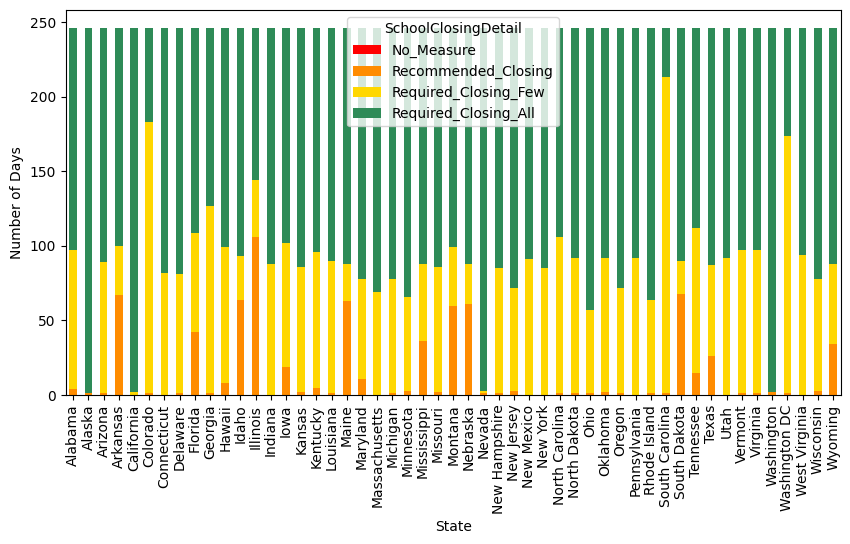

In [53]:
if "No_Measure" not in df1_graph_school.columns:
    df1_graph_school = df1_graph_school.assign(No_Measure=0)

colors = ["red", "darkorange", "gold", "seagreen"]
df1_graph_school.plot(x= "State", y= ["No_Measure", "Recommended_Closing", "Required_Closing_Few", "Required_Closing_All"], kind= "bar", stacked= "true", figsize= (10, 5), color=colors)
plt.ylabel("Number of Days")